<h1>Data Analysis and Visualization Home Assignment</h1>
<li>I've tried to outline the steps for you so please make use of the cells
<li>If you run into data size issues, subset your data. But try to use as much as you can get away with
<li>Note that many of the steps will take a while to run, especially if your computer is not powerful enough. Be patient! 


<ol>
<li>Read the data from <b>yellow_tripdata_small_2016-01.csv</b>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Convert duration into a float
<li>Do some basic analysis (see below)
<li>Add a day of week column
<li>Add an hour of day column
<li>Do some analysis (see below)
<li>Divide the data into zones
<ul>
<li>write a function createZoneTable(zone_factor) that divides the bounding box into zones
<li>the idea is to create zone_factor * zone_factor zones
<li>e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
<li>Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
<li>Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
<li>Return a table (a list of lists) containing a zone id, and the coordinates of the zone
<li>(see e.g., below)
</ul>
<li>Write a function get_zone(lon,lat) that figures out the zone given a latitude and longitude
<li>Apply this function to the dataframe, first with pickup lats and longs; then with dropoff lats and longs
<li>This will give two new "pickup_zone" and "dropoff_zone" columns
<li>Do some analysis (see below)
<li>Using folium, draw a heatmap of the number of trips originating in each zone
<ul>
<li>Create a geojson object for all the zones 
<li>Create a df that contains zone numbers and the number of trips originating in each zone
<li>Use folium to create a heatmap
<li><b>OPTIONAL:</b> You'll notice that the bounding box is much larger than New York City. Try to remove every zone that has 0 originating trips from your map. (Hint: You can remove them from the geojson object)


<h2>Read the data</h2>


In [3]:
#Add necessary imports and functions to read the data
import numpy as np
import pandas as pd

df = pd.read_csv("yellow_tripdata_small_2016-01.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59


In [4]:
df.info()
#looks good(no missing values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090686 entries, 0 to 1090685
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1090686 non-null  int64  
 1   tpep_pickup_datetime   1090686 non-null  object 
 2   tpep_dropoff_datetime  1090686 non-null  object 
 3   passenger_count        1090686 non-null  int64  
 4   trip_distance          1090686 non-null  float64
 5   pickup_longitude       1090686 non-null  float64
 6   pickup_latitude        1090686 non-null  float64
 7   RatecodeID             1090686 non-null  int64  
 8   store_and_fwd_flag     1090686 non-null  object 
 9   dropoff_longitude      1090686 non-null  float64
 10  dropoff_latitude       1090686 non-null  float64
 11  payment_type           1090686 non-null  int64  
 12  fare_amount            1090686 non-null  float64
 13  extra                  1090686 non-null  float64
 14  mta_tax           

<h2>Remove data outside the bounding box</h2>


In [5]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
#Remove the data that is not within the limits specified above
#Removed if either pickup point or dropoff point is not within box

df = df[(df['pickup_longitude']>=westlimit) & (df['pickup_longitude']<=eastlimit) \
        & (df['dropoff_longitude']>=westlimit) & (df['dropoff_longitude']<=eastlimit) \
       & (df['pickup_latitude']>=southlimit) & (df['pickup_latitude']<=northlimit) \
       & (df['dropoff_latitude']>=southlimit) & (df['dropoff_latitude']<=northlimit)]

In [6]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59


<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [7]:
import datetime
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))


df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df

<ipython-input-7-282c280b64e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
<ipython-input-7-282c280b64e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
<ipython-input-7-282c280b64e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,00:10:57
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,00:06:05
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,00:08:22
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,00:03:14
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,00:22:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,00:12:23
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,00:03:58
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,00:08:02
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,00:22:06


<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [8]:
type(df['duration'][0])

pandas._libs.tslibs.timedeltas.Timedelta

In [9]:
df['duration'] = df['duration'].apply(lambda x: x.total_seconds())
df

<ipython-input-9-0374123d7246>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['duration'].apply(lambda x: x.total_seconds())


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0


<h2>Remove data where duration is greater than 10000 seconds</h2>

In [10]:
df = df[df['duration']<=10000]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0


<h2>Plot duration and compare with a gamma distribution</h2>

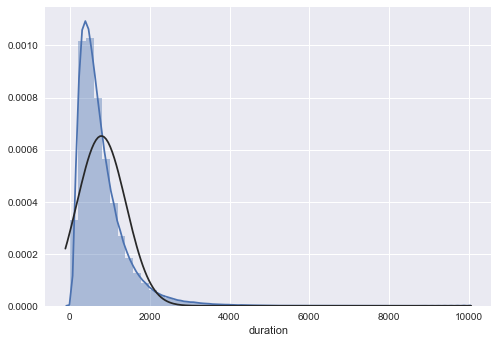

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from scipy import stats

sns.distplot(df['duration'], fit=stats.norm)
# I used norm, becuase the gamma function wouldn't fit to the data for some reason...



<h2>Plot the scatter plot between trip_distance and duration</h2>

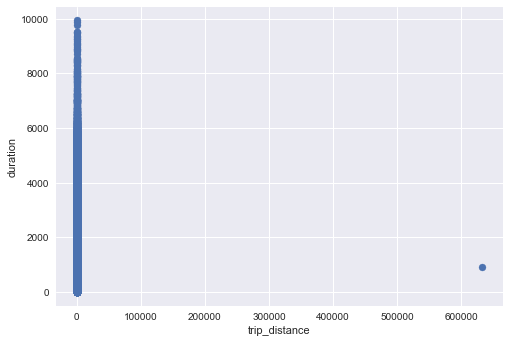

In [12]:
plt.scatter(df['trip_distance'], df['duration'])
plt.xlabel('trip_distance')
plt.ylabel('duration')
plt.show()
# one point seems to hinder us from visualizing the relation between the two factors. 
# let's remove the outlier

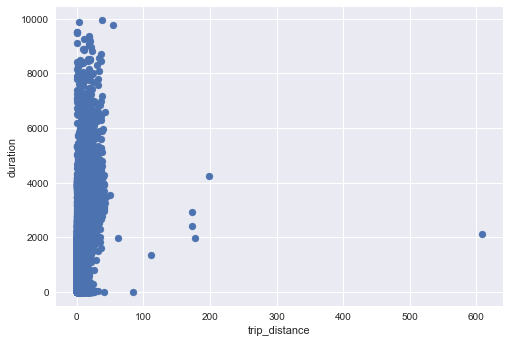

In [13]:
df_short = df[df['trip_distance']<10000]
plt.scatter(df_short['trip_distance'], df_short['duration'])
plt.xlabel('trip_distance')
plt.ylabel('duration')
plt.show()
# again, we will eliminate trip distance >= 60 to see the relationsip more clearly

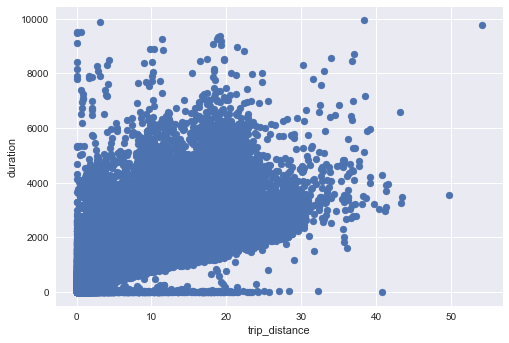

In [14]:
df_shorter = df[df['trip_distance']<60]
plt.scatter(df_shorter['trip_distance'], df_shorter['duration'])
plt.xlabel('trip_distance')
plt.ylabel('duration')
plt.show()
# now we can see that there is a somewhat positive linear relationship between the two variables. 

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [15]:
df['day_of_week'] = df['tpep_pickup_datetime'].apply(lambda x: x.weekday()+1)
df

<ipython-input-15-9cf1dd5b0ee4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['tpep_pickup_datetime'].apply(lambda x: x.weekday()+1)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0,1
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0,3
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0,2
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0,7
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0,4
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0,4
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0,6
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0,7


<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>

In [16]:
df['pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x: x.hour)
df

<ipython-input-16-2a1a06a7d0c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x: x.hour)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0,1,10
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0,3,10
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0,2,0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0,7,16
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0,4,7
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0,4,1
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0,6,10
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0,7,15


<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
<li>Do you notice any differences?</li>

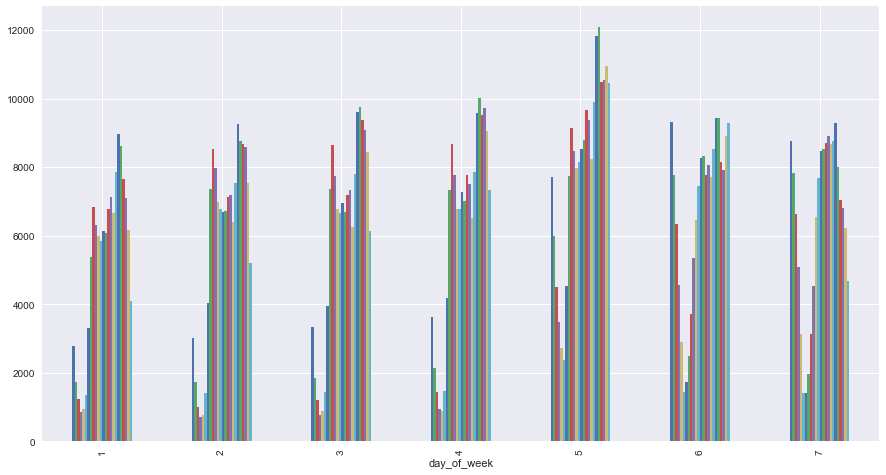

In [17]:
import matplotlib.pyplot as plt
df.groupby(['day_of_week', 'pickup_hour']).size().unstack().plot(kind='bar', figsize=(15,8), legend=False)

# we see that number of travel around midnight (23~3 o'clock) is very small on Mondays~Thursdays but much larger for Fridays~Sundays.
# Also, there are more rides in the morning on weekdays, compared to weekends. This is probably due to commute. 
# most rides in Friday

<h2>Create zones</h2>

<li>Divide the data into zones
<ul>
<li>write a function createZoneTable(zone_factor) that divides the bounding box into zones
<li>the idea is to create zone_factor * zone_factor zones
<li>e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
<li>Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
<li>Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
<li>Return a table (a list of lists) containing a zone id, and the coordinates of the zone
<li>(see e.g., below)
</ul>

In [18]:
import math 

def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = list()
    #Your code goes here
    
    latpoints = np.linspace(southlimit, northlimit, num=zone_factor+1)
    longpoints = np.linspace(westlimit, eastlimit, num=zone_factor+1)
    
    for i in range(zone_factor):
        for j in range(zone_factor):               # ordered differently from example to match geojson object in the last cell
            sw = [longpoints[j], latpoints[i]]
            nw = [longpoints[j+1], latpoints[i]]
            ne = [longpoints[j+1], latpoints[i+1]]
            se = [longpoints[j], latpoints[i+1]]
        
            zone_num = str(zone_factor*i+j).zfill(int(math.log10(zone_factor**2))+1)
            zone_coordinates = [sw,se,ne,nw,sw]
            
            zone_table.append((zone_num, zone_coordinates))

    return zone_table

In [19]:
createZoneTable(2)

[('0',
  [[-74.2635, 40.4856],
   [-74.2635, 40.7226],
   [-74.00805, 40.7226],
   [-74.00805, 40.4856],
   [-74.2635, 40.4856]]),
 ('1',
  [[-74.00805, 40.4856],
   [-74.00805, 40.7226],
   [-73.7526, 40.7226],
   [-73.7526, 40.4856],
   [-74.00805, 40.4856]]),
 ('2',
  [[-74.2635, 40.7226],
   [-74.2635, 40.9596],
   [-74.00805, 40.9596],
   [-74.00805, 40.7226],
   [-74.2635, 40.7226]]),
 ('3',
  [[-74.00805, 40.7226],
   [-74.00805, 40.9596],
   [-73.7526, 40.9596],
   [-73.7526, 40.7226],
   [-74.00805, 40.7226]])]

Example of a zone table

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.21240999999999],
   [40.533, -74.21240999999999],
   [40.533, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.16131999999999],
   [40.533, -74.16131999999999],
   [40.533, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('02',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.11022999999999],
   [40.533, -74.11022999999999],
   [40.533, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('03',
  [[40.4856, -74.11022999999999],
   [40.4856, -74.05913999999999],
   [40.533, -74.05913999999999],
   [40.533, -74.11022999999999],
   [40.4856, -74.11022999999999]]),

In [20]:
def createGeoJsonObject(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    zone_data_dict['features'] = zone_data_dict_features
    
    #Your code goes here
    for zone in zone_table:
        zone_dict = dict()
        zone_dict["type"] = "Feature"
        zone_dict["geometry"] = {"type":"Polygon", "coordinates":[zone[1]]}
        zone_dict["properties"] = {"zone_id":zone[0]}
        zone_data_dict['features'].append(zone_dict)
    
    
    return zone_data_dict

In [21]:
createGeoJsonObject(createZoneTable(2))

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-74.2635, 40.4856],
      [-74.2635, 40.7226],
      [-74.00805, 40.7226],
      [-74.00805, 40.4856],
      [-74.2635, 40.4856]]]},
   'properties': {'zone_id': '0'}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-74.00805, 40.4856],
      [-74.00805, 40.7226],
      [-73.7526, 40.7226],
      [-73.7526, 40.4856],
      [-74.00805, 40.4856]]]},
   'properties': {'zone_id': '1'}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-74.2635, 40.7226],
      [-74.2635, 40.9596],
      [-74.00805, 40.9596],
      [-74.00805, 40.7226],
      [-74.2635, 40.7226]]]},
   'properties': {'zone_id': '2'}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-74.00805, 40.7226],
      [-74.00805, 40.9596],
      [-73.7526, 40.9596],
      [-73.7526, 40.7226],
      [-74.00805, 40.7226]]]},


Example of the 'features' list in the geojson object

{'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11022999999999, 40.4856],
      [-74.11022999999999, 40.533],
      [-74.16131999999999, 40.533],
      [-74.16131999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},

<h3>Create the zone table for zone_factor = 20</h3>

In [22]:
zone_factor = 20
zone_table = createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)
zone_table

[('000',
  [[-74.2635, 40.4856],
   [-74.2635, 40.509299999999996],
   [-74.237955, 40.509299999999996],
   [-74.237955, 40.4856],
   [-74.2635, 40.4856]]),
 ('001',
  [[-74.237955, 40.4856],
   [-74.237955, 40.509299999999996],
   [-74.21240999999999, 40.509299999999996],
   [-74.21240999999999, 40.4856],
   [-74.237955, 40.4856]]),
 ('002',
  [[-74.21240999999999, 40.4856],
   [-74.21240999999999, 40.509299999999996],
   [-74.186865, 40.509299999999996],
   [-74.186865, 40.4856],
   [-74.21240999999999, 40.4856]]),
 ('003',
  [[-74.186865, 40.4856],
   [-74.186865, 40.509299999999996],
   [-74.16131999999999, 40.509299999999996],
   [-74.16131999999999, 40.4856],
   [-74.186865, 40.4856]]),
 ('004',
  [[-74.16131999999999, 40.4856],
   [-74.16131999999999, 40.509299999999996],
   [-74.135775, 40.509299999999996],
   [-74.135775, 40.4856],
   [-74.16131999999999, 40.4856]]),
 ('005',
  [[-74.135775, 40.4856],
   [-74.135775, 40.509299999999996],
   [-74.11023, 40.509299999999996],
   

<h2>Write a function that returns a zone number given a latitude and a longitude</h2>

<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(-74.19,40.65)</span> the function should return "62" (for a zone factor of 20, assuming you have numbered the zones from 1 to 400)

In [23]:
def get_zone(lon,lat,zone_table):
    
    #Your code goes here
    
    return_zone = ''
    
    for zone in zone_table:
        coordinates = zone[1]
        s = coordinates[0][1]
        w = coordinates[0][0]
        n = coordinates[2][1]
        e = coordinates[2][0]
        
        if (s<=lat<n) and (w<=lon<e):
            return_zone = zone[0]
            break
    
    
    return return_zone



In [24]:
get_zone(-74.19,40.65,zone_table)

'122'

<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>apply</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [25]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [26]:
df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_longitude'], x['pickup_latitude'], zone_table), axis = 1)
df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_longitude'], x['dropoff_latitude'], zone_table), axis = 1)

df

<ipython-input-26-33cce000b6bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_longitude'], x['pickup_latitude'], zone_table), axis = 1)
<ipython-input-26-33cce000b6bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_longitude'], x['dropoff_latitude'], zone_table), axis = 1)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour,pickup_zone,dropoff_zone
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,0.5,1.85,0.00,0.3,11.15,657.0,1,10,231,230
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,0.5,1.36,0.00,0.3,8.16,365.0,3,10,252,251
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,0.5,2.00,0.00,0.3,12.30,502.0,2,0,209,189
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,0.5,1.30,0.00,0.3,6.60,194.0,7,16,251,252
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,0.5,0.00,0.00,0.3,14.30,1351.0,2,11,231,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,0.5,2.16,0.00,0.3,12.96,743.0,4,7,189,210
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,0.5,0.00,0.00,0.3,6.80,238.0,4,1,251,271
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,0.5,1.65,0.00,0.3,9.95,482.0,6,10,210,190
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,0.5,6.75,5.54,0.3,40.59,1326.0,7,15,255,271


<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [27]:
# Percentage of the total rides where the pickup zone is the same as the dropoff zone
# 23.67%

len(df[df['pickup_zone'] == df['dropoff_zone']]) / len(df) * 100


23.668056081849183

In [28]:
# Zone with the highest pickups
df.groupby('pickup_zone').size().idxmax()

'231'

In [29]:
# Zone with the highest dropoffs
df.groupby('dropoff_zone').size().idxmax()

'231'

<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


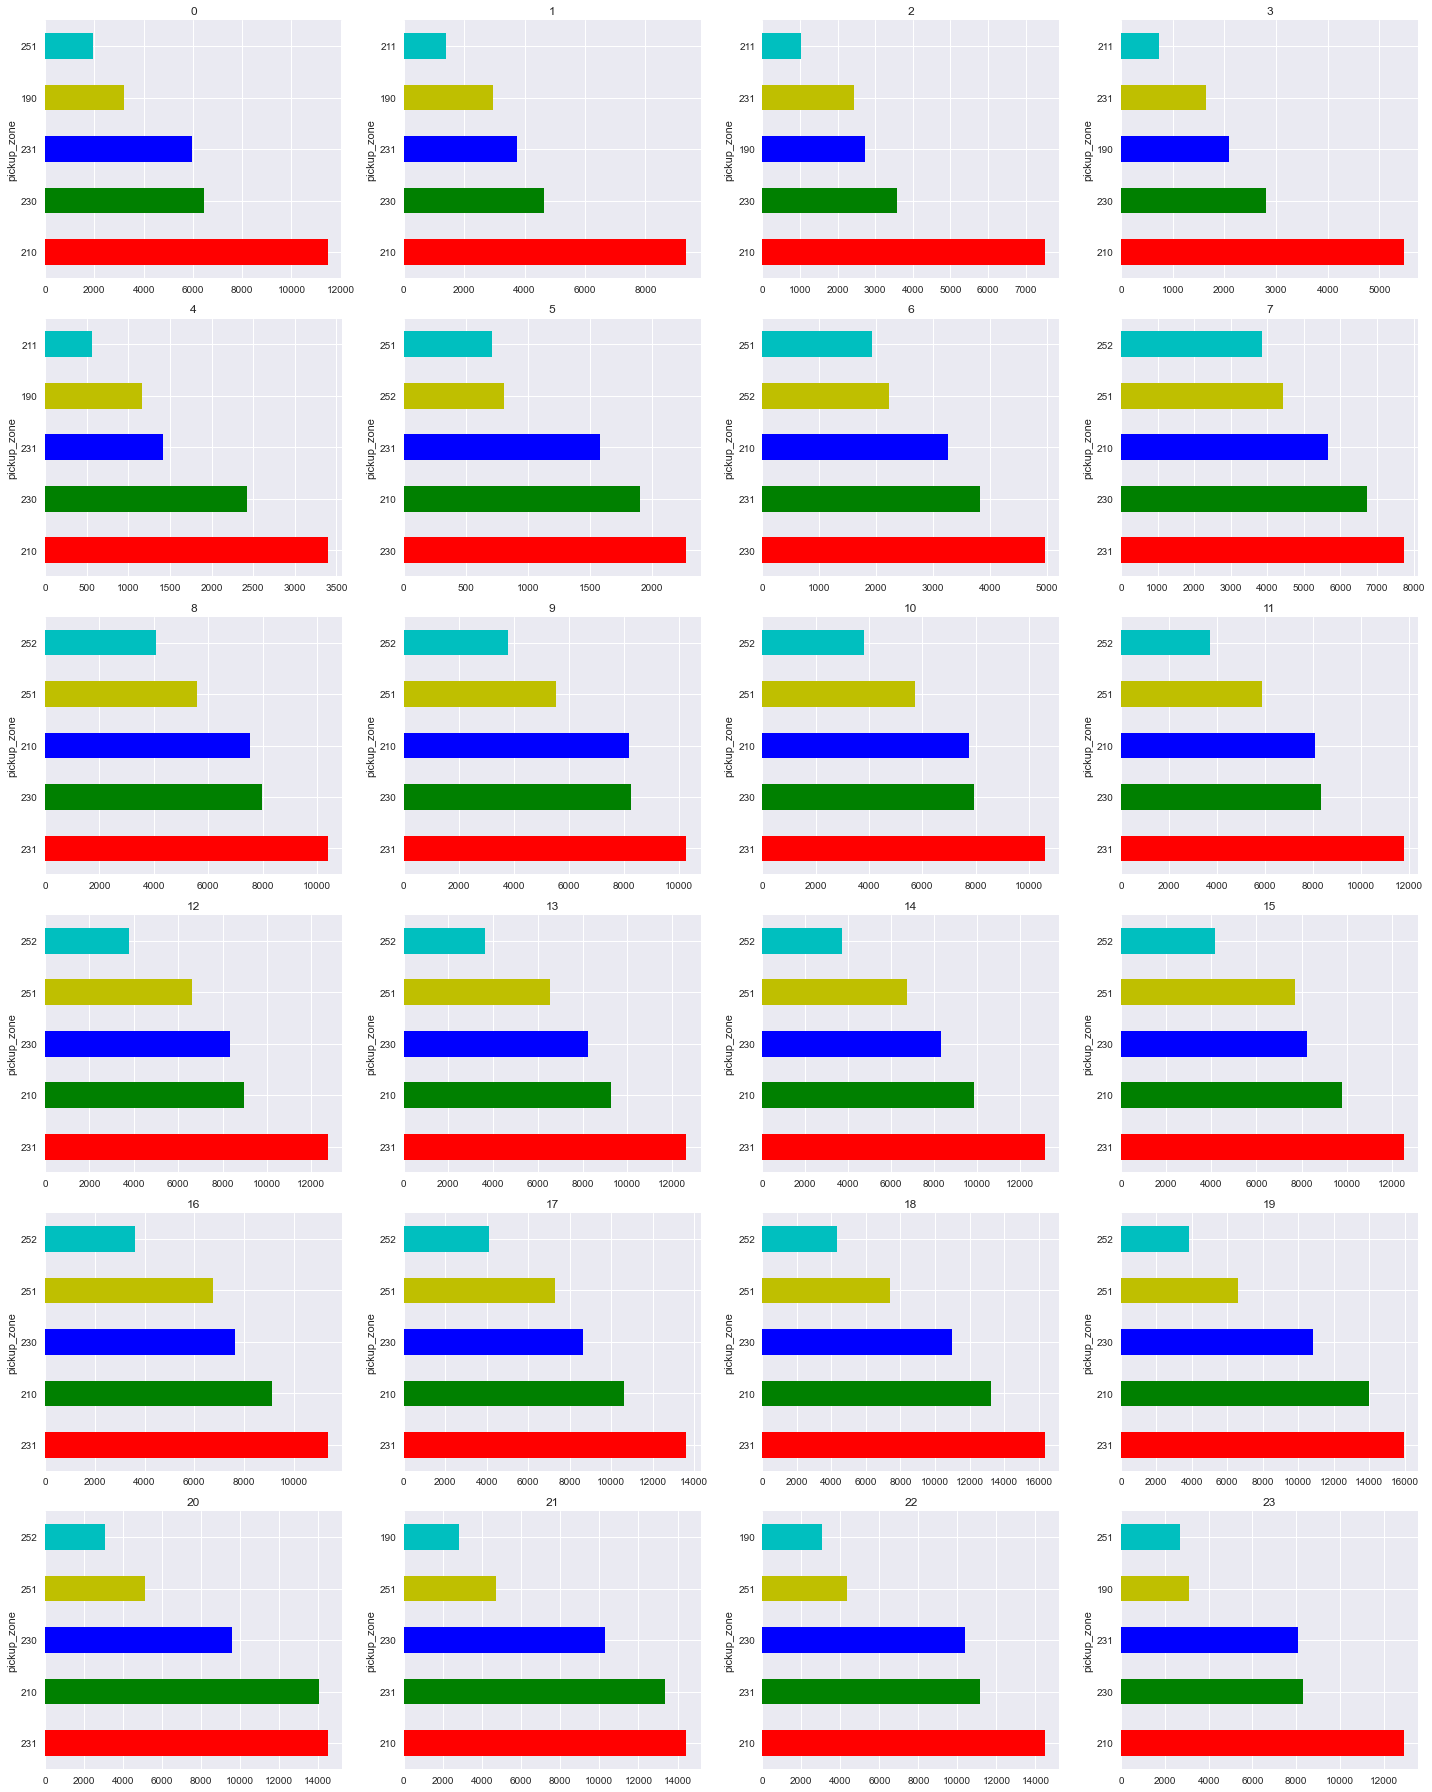

In [30]:
zone_hour = df.groupby(['pickup_zone', 'pickup_hour']).size().unstack()

# We'll arrange the subplots in six rows and four columns. 

%matplotlib inline
COL_NUM = 4
ROW_NUM = 6

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,25)) 
colors = ['r', 'g', 'b', 'y', 'c']

for i, (hour, zone_count) in enumerate(zone_hour.items()): 
    
    ax = axes[i//COL_NUM, i%COL_NUM] # pointing to one of the subplots
    zone_count = zone_count.sort_values(ascending=False)[:5] 
    zone_count.plot(kind='barh', ax=ax, color = colors) # horizontal barplot, set which subplot 
    ax.set_title(hour)

plt.tight_layout() 

<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

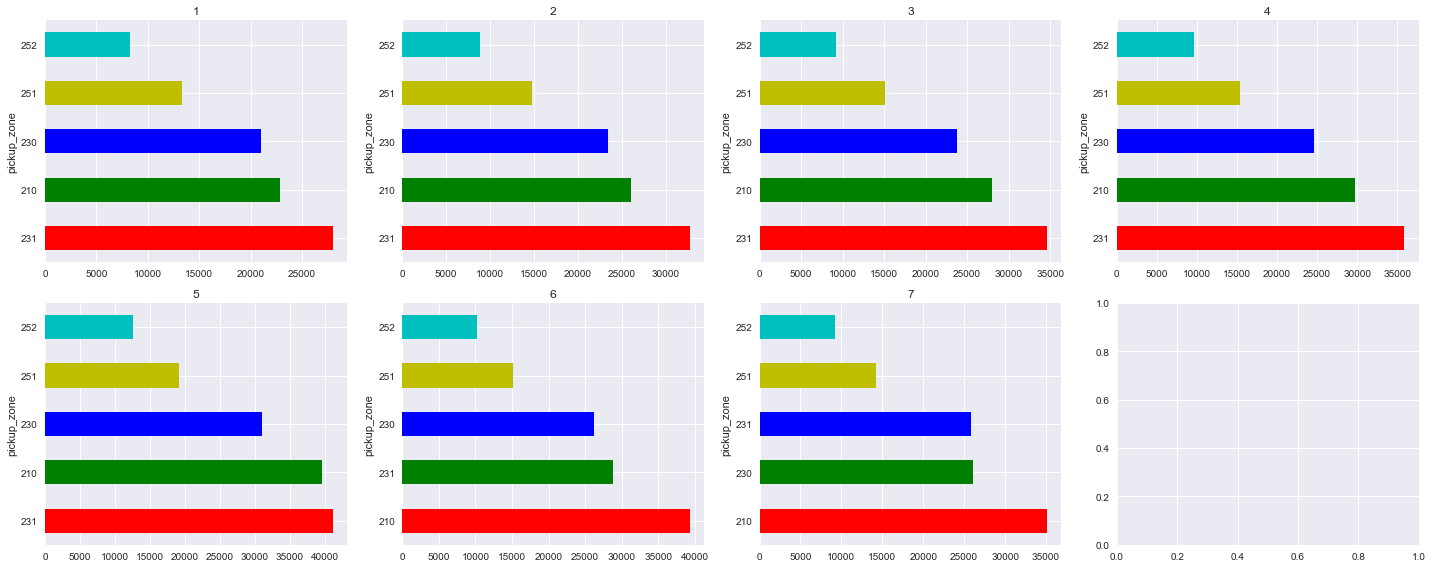

In [31]:
zone_day = df.groupby(['pickup_zone', 'day_of_week']).size().unstack()

# We'll arrange the subplots in six rows and four columns. 

%matplotlib inline
COL_NUM = 4
ROW_NUM = 2

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,8)) 
colors = ['r', 'g', 'b', 'y', 'c']

for i, (day, zone_count) in enumerate(zone_day.items()): 
    
    ax = axes[i//COL_NUM, i%COL_NUM] # pointing to one of the subplots
    zone_count = zone_count.sort_values(ascending=False)[:5] 
    zone_count.plot(kind='barh', ax=ax, color = colors) # horizontal barplot, set which subplot 
    ax.set_title(day)

plt.tight_layout() 

<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday



In [32]:
df[(df['day_of_week']<=5) & (df['pickup_hour']==8)].groupby('pickup_zone').size().idxmax()

'231'

<h2>Mapping</h2>
<li>Draw a folium map using the polygon geojson object and the counts dataframe (see class example)

In [33]:
import folium
import json

In [34]:
myzones = json.dumps(createGeoJsonObject(zone_table))

In [35]:
sizes = pd.DataFrame(df.groupby('pickup_zone').size()).reset_index().rename(columns={0:"size"})
sizes

,pickup_zone,size
0,024,1
1,049,1
2,065,1
3,066,1
4,070,5
...,...,...
202,384,1
203,387,2
204,389,1
205,395,1


In [36]:
m = folium.Map(location = [40.7589,-73.9851],zoom_start=10)

m.choropleth(geo_data=myzones, data=sizes,
             columns=['pickup_zone', 'size'],
             key_on='feature.properties.zone_id',          
             fill_color='RdYlGn_r', fill_opacity=0.5, line_opacity=0.6,    
             legend_name='Distribution of Pickup Locations')
folium.LayerControl().add_to(m)

C:\Users\sohnh\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [37]:
m